In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub

# Download the dataset from Kaggle
dataset_path = kagglehub.dataset_download("d4rklucif3r/market-basket-optimisation")

print("Dataset downloaded to:", dataset_path)


100%|██████████| 46.9k/46.9k [00:00<00:00, 21.4MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/d4rklucif3r/market-basket-optimisation/versions/1


In [ ]:
import kagglehub

# Download the dataset from Kaggle
dataset_path = kagglehub.dataset_download("d4rklucif3r/market-basket-optimisation")


In [ ]:
import os
import pandas as pd

# Build the correct path to the CSV file
csv_file = os.path.join(dataset_path, "Market_Basket_Optimisation.csv")

# Load the data without headers
dataset = pd.read_csv(csv_file, header=None)

# Convert into list of lists
transactions = []
for i in range(len(dataset)):
    transaction = [str(item).strip() for item in dataset.iloc[i] if str(item) != 'nan']
    transactions.append(transaction)


In [ ]:
# Run Apriori with your custom function
rules = apriori(
    transactions,
    min_support=0.003,
    min_confidence=0.2,
    min_lift=3,
    max_length=3
)

# Print the results
for rule in rules:
    print(f"\nRule: {sorted(rule.items)}")
    print(f"Support: {rule.support:.4f}")
    for stat in rule.ordered_statistics:
        print(f"  Base: {', '.join(stat.items_base)} -> Add: {', '.join(stat.items_add)}")
        print(f"  Confidence: {stat.confidence:.2f}, Lift: {stat.lift:.2f}")



Rule: ['chicken', 'light cream']
Support: 0.0045
  Base: light cream -> Add: chicken
  Confidence: 0.29, Lift: 4.84

Rule: ['escalope', 'mushroom cream sauce']
Support: 0.0057
  Base: mushroom cream sauce -> Add: escalope
  Confidence: 0.30, Lift: 3.79

Rule: ['escalope', 'pasta']
Support: 0.0059
  Base: pasta -> Add: escalope
  Confidence: 0.37, Lift: 4.70

Rule: ['fromage blanc', 'honey']
Support: 0.0033
  Base: fromage blanc -> Add: honey
  Confidence: 0.25, Lift: 5.16

Rule: ['ground beef', 'herb & pepper']
Support: 0.0160
  Base: herb & pepper -> Add: ground beef
  Confidence: 0.32, Lift: 3.29

Rule: ['ground beef', 'tomato sauce']
Support: 0.0053
  Base: tomato sauce -> Add: ground beef
  Confidence: 0.38, Lift: 3.84

Rule: ['light cream', 'olive oil']
Support: 0.0032
  Base: light cream -> Add: olive oil
  Confidence: 0.21, Lift: 3.11

Rule: ['olive oil', 'whole wheat pasta']
Support: 0.0080
  Base: whole wheat pasta -> Add: olive oil
  Confidence: 0.27, Lift: 4.12

Rule: ['pas

In [ ]:
!pip install apyori


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=a9c65c2a16f0613faf63c7dee22e756180f2776d107647af6660d605b98fe076
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [ ]:
from apyori import apriori


In [ ]:
import os
import pandas as pd
from kagglehub import dataset_download

# Step 1: Download the dataset from Kaggle
dataset_path = dataset_download("d4rklucif3r/market-basket-optimisation")

# Step 2: Load the CSV file from the downloaded path
csv_file = os.path.join(dataset_path, "Market_Basket_Optimisation.csv")
dataset = pd.read_csv(csv_file, header=None)

# Step 3: Convert dataset to list of transactions (remove NaNs)
transactions = []
for i in range(len(dataset)):
    row = [str(item).strip() for item in dataset.iloc[i] if pd.notnull(item)]
    transactions.append(row)

# Step 4: Run Apriori algorithm on the transactions
from apyori import apriori

# Define thresholds: support, confidence, lift, and length
rules = apriori(
    transactions,
    min_support=0.003,
    min_confidence=0.2,
    min_lift=3,
    min_length=2
)

# Step 5: Print the association rules
results = list(rules)

# Step 6: Displaying the rules in a readable format
for rule in results:
    items = list(rule.items)
    print(f"\nRule: {items}")
    print(f"Support: {rule.support:.4f}")
    for stat in rule.ordered_statistics:
        base = list(stat.items_base)
        add = list(stat.items_add)
        print(f"  {base} -> {add}")
        print(f"  Confidence: {stat.confidence:.2f} | Lift: {stat.lift:.2f}")



Rule: ['light cream', 'chicken']
Support: 0.0045
  ['light cream'] -> ['chicken']
  Confidence: 0.29 | Lift: 4.84

Rule: ['mushroom cream sauce', 'escalope']
Support: 0.0057
  ['mushroom cream sauce'] -> ['escalope']
  Confidence: 0.30 | Lift: 3.79

Rule: ['pasta', 'escalope']
Support: 0.0059
  ['pasta'] -> ['escalope']
  Confidence: 0.37 | Lift: 4.70

Rule: ['fromage blanc', 'honey']
Support: 0.0033
  ['fromage blanc'] -> ['honey']
  Confidence: 0.25 | Lift: 5.16

Rule: ['ground beef', 'herb & pepper']
Support: 0.0160
  ['herb & pepper'] -> ['ground beef']
  Confidence: 0.32 | Lift: 3.29

Rule: ['ground beef', 'tomato sauce']
Support: 0.0053
  ['tomato sauce'] -> ['ground beef']
  Confidence: 0.38 | Lift: 3.84

Rule: ['light cream', 'olive oil']
Support: 0.0032
  ['light cream'] -> ['olive oil']
  Confidence: 0.21 | Lift: 3.11

Rule: ['olive oil', 'whole wheat pasta']
Support: 0.0080
  ['whole wheat pasta'] -> ['olive oil']
  Confidence: 0.27 | Lift: 4.12

Rule: ['shrimp', 'pasta']
S

In [ ]:
# Step 2: Convert the dataset into a list of transactions
# Each row in the dataset represents a transaction, with items as columns
transactions = []
for i in range(len(dataset)):
    # Filter out any missing values (NaN) and convert the values to strings for consistent processing
    transaction = [str(dataset.iloc[i, j]) for j in range(len(dataset.columns)) if pd.notnull(dataset.iloc[i, j])]
    transactions.append(transaction)

# Step 3: Apply the Apriori algorithm to the transactions
# We set the parameters for minimum support, minimum confidence, lift, and length
rules = apriori(transactions, min_support=0.003, min_confidence=0.2, min_lift=3, min_length=2)

# Step 4: Collect and visualize the results
# Converting the result into a list and printing each rule with its details
results = list(rules)

# Step 5: Displaying the rules in a readable format
for rule in results:
    items = list(rule.items)
    print(f"\nRule: {items}")
    print(f"Support: {rule.support:.4f}")
    for stat in rule.ordered_statistics:
        base = list(stat.items_base)
        add = list(stat.items_add)
        print(f"  {base} -> {add}")
        print(f"  Confidence: {stat.confidence:.2f} | Lift: {stat.lift:.2f}")


Rule: ['light cream', 'chicken']
Support: 0.0045
  ['light cream'] -> ['chicken']
  Confidence: 0.29 | Lift: 4.84

Rule: ['mushroom cream sauce', 'escalope']
Support: 0.0057
  ['mushroom cream sauce'] -> ['escalope']
  Confidence: 0.30 | Lift: 3.79

Rule: ['pasta', 'escalope']
Support: 0.0059
  ['pasta'] -> ['escalope']
  Confidence: 0.37 | Lift: 4.70

Rule: ['fromage blanc', 'honey']
Support: 0.0033
  ['fromage blanc'] -> ['honey']
  Confidence: 0.25 | Lift: 5.16

Rule: ['ground beef', 'herb & pepper']
Support: 0.0160
  ['herb & pepper'] -> ['ground beef']
  Confidence: 0.32 | Lift: 3.29

Rule: ['ground beef', 'tomato sauce']
Support: 0.0053
  ['tomato sauce'] -> ['ground beef']
  Confidence: 0.38 | Lift: 3.84

Rule: ['light cream', 'olive oil']
Support: 0.0032
  ['light cream'] -> ['olive oil']
  Confidence: 0.21 | Lift: 3.11

Rule: ['olive oil', 'whole wheat pasta']
Support: 0.0080
  ['whole wheat pasta'] -> ['olive oil']
  Confidence: 0.27 | Lift: 4.12

Rule: ['shrimp', 'pasta']
S

In [ ]:
class TransactionManager(object):
    def __init__(self, transactions):
        """
        Initialize the transaction manager with a list of transactions.
        """
        self._num_transactions = 0  # Use a private variable instead of the property
        self.items = []
        self.item_map = {}

        for transaction in transactions:
            self.add_transaction(transaction)



In [ ]:
@property
def num_transactions(self):
    """
    Returns the number of transactions.
    """
    return self._num_transactions


In [ ]:
class TransactionManager(object):
    def __init__(self, transactions):
        """
        Initialize the transaction manager with a list of transactions.
        """
        self._num_transactions = 0  # Private variable to store the count of transactions
        self.items = []
        self.item_map = {}

        for transaction in transactions:
            self.add_transaction(transaction)

    def add_transaction(self, transaction):
        """
        Add a transaction.
        """
        for item in transaction:
            if item not in self.item_map:
                self.items.append(item)
                self.item_map[item] = set()
            self.item_map[item].add(self._num_transactions)
        self._num_transactions += 1

    @property
    def num_transactions(self):
        """
        Returns the number of transactions.
        """
        return self._num_transactions

    # Other methods...


In [ ]:
#!/usr/bin/env python

"""
a simple implementation of Apriori algorithm by Python.
"""

import sys
import csv
import argparse
import json
import os
from collections import namedtuple
from itertools import combinations
from itertools import chain


# Meta informations.
__version__ = '1.1.1'
__author__ = 'Yu Mochizuki'
__author_email__ = 'ymoch.dev@gmail.com'


################################################################################
# Data structures.
################################################################################
class TransactionManager(object):
    """
    Transaction managers.
    """

    def __init__(self, transactions):
        """
        Initialize.

        Arguments:
            transactions -- A transaction iterable object
                            (eg. [['A', 'B'], ['B', 'C']]).
        """
        self.__num_transaction = 0
        self.__items = []
        self.__transaction_index_map = {}

        for transaction in transactions:
            self.add_transaction(transaction)

    def add_transaction(self, transaction):
        """
        Add a transaction.

        Arguments:
            transaction -- A transaction as an iterable object (eg. ['A', 'B']).
        """
        for item in transaction:
            if item not in self.__transaction_index_map:
                self.__items.append(item)
                self.__transaction_index_map[item] = set()
            self.__transaction_index_map[item].add(self.__num_transaction)
        self.__num_transaction += 1

    def calc_support(self, items):
        """
        Returns a support for items.

        Arguments:
            items -- Items as an iterable object (eg. ['A', 'B']).
        """
        # Empty items is supported by all transactions.
        if not items:
            return 1.0

        # Empty transactions supports no items.
        if not self.num_transaction:
            return 0.0

        # Create the transaction index intersection.
        sum_indexes = None
        for item in items:
            indexes = self.__transaction_index_map.get(item)
            if indexes is None:
                # No support for any set that contains a not existing item.
                return 0.0

            if sum_indexes is None:
                # Assign the indexes on the first time.
                sum_indexes = indexes
            else:
                # Calculate the intersection on not the first time.
                sum_indexes = sum_indexes.intersection(indexes)

        # Calculate and return the support.
        return float(len(sum_indexes)) / self.__num_transaction

    def initial_candidates(self):
        """
        Returns the initial candidates.
        """
        return [frozenset([item]) for item in self.items]

    @property
    def num_transaction(self):
        """
        Returns the number of transactions.
        """
        return self.__num_transaction

    @property
    def items(self):
        """
        Returns the item list that the transaction is consisted of.
        """
        return sorted(self.__items)

    @staticmethod
    def create(transactions):
        """
        Create the TransactionManager with a transaction instance.
        If the given instance is a TransactionManager, this returns itself.
        """
        if isinstance(transactions, TransactionManager):
            return transactions
        return TransactionManager(transactions)


# Ignore name errors because these names are namedtuples.
SupportRecord = namedtuple( # pylint: disable=C0103
    'SupportRecord', ('items', 'support'))
RelationRecord = namedtuple( # pylint: disable=C0103
    'RelationRecord', SupportRecord._fields + ('ordered_statistics',))
OrderedStatistic = namedtuple( # pylint: disable=C0103
    'OrderedStatistic', ('items_base', 'items_add', 'confidence', 'lift',))


################################################################################
# Inner functions.
################################################################################
def create_next_candidates(prev_candidates, length):
    """
    Returns the apriori candidates as a list.

    Arguments:
        prev_candidates -- Previous candidates as a list.
        length -- The lengths of the next candidates.
    """
    # Solve the items.
    item_set = set()
    for candidate in prev_candidates:
        for item in candidate:
            item_set.add(item)
    items = sorted(item_set)

    # Create the temporary candidates. These will be filtered below.
    tmp_next_candidates = (frozenset(x) for x in combinations(items, length))

    # Return all the candidates if the length of the next candidates is 2
    # because their subsets are the same as items.
    if length < 3:
        return list(tmp_next_candidates)

    # Filter candidates that all of their subsets are
    # in the previous candidates.
    next_candidates = [
        candidate for candidate in tmp_next_candidates
        if all(
            True if frozenset(x) in prev_candidates else False
            for x in combinations(candidate, length - 1))
    ]
    return next_candidates


def gen_support_records(transaction_manager, min_support, **kwargs):
    """
    Returns a generator of support records with given transactions.

    Arguments:
        transaction_manager -- Transactions as a TransactionManager instance.
        min_support -- A minimum support (float).

    Keyword arguments:
        max_length -- The maximum length of relations (integer).
    """
    # Parse arguments.
    max_length = kwargs.get('max_length')

    # For testing.
    _create_next_candidates = kwargs.get(
        '_create_next_candidates', create_next_candidates)

    # Process.
    candidates = transaction_manager.initial_candidates()
    length = 1
    while candidates:
        relations = set()
        for relation_candidate in candidates:
            support = transaction_manager.calc_support(relation_candidate)
            if support < min_support:
                continue
            candidate_set = frozenset(relation_candidate)
            relations.add(candidate_set)
            yield SupportRecord(candidate_set, support)
        length += 1
        if max_length and length > max_length:
            break
        candidates = _create_next_candidates(relations, length)


def gen_ordered_statistics(transaction_manager, record):
    """
    Returns a generator of ordered statistics as OrderedStatistic instances.

    Arguments:
        transaction_manager -- Transactions as a TransactionManager instance.
        record -- A support record as a SupportRecord instance.
    """
    items = record.items
    for combination_set in combinations(sorted(items), len(items) - 1):
        items_base = frozenset(combination_set)
        items_add = frozenset(items.difference(items_base))
        confidence = (
            record.support / transaction_manager.calc_support(items_base))
        lift = confidence / transaction_manager.calc_support(items_add)
        yield OrderedStatistic(
            frozenset(items_base), frozenset(items_add), confidence, lift)


def filter_ordered_statistics(ordered_statistics, **kwargs):
    """
    Filter OrderedStatistic objects.

    Arguments:
        ordered_statistics -- A OrderedStatistic iterable object.

    Keyword arguments:
        min_confidence -- The minimum confidence of relations (float).
        min_lift -- The minimum lift of relations (float).
    """
    min_confidence = kwargs.get('min_confidence', 0.0)
    min_lift = kwargs.get('min_lift', 0.0)

    for ordered_statistic in ordered_statistics:
        if ordered_statistic.confidence < min_confidence:
            continue
        if ordered_statistic.lift < min_lift:
            continue
        yield ordered_statistic


################################################################################
# API function.
################################################################################
def apriori(transactions, **kwargs):
    """
    Executes Apriori algorithm and returns a RelationRecord generator.

    Arguments:
        transactions -- A transaction iterable object
                        (eg. [['A', 'B'], ['B', 'C']]).

    Keyword arguments:
        min_support -- The minimum support of relations (float).
        min_confidence -- The minimum confidence of relations (float).
        min_lift -- The minimum lift of relations (float).
        max_length -- The maximum length of the relation (integer).
    """
    # Parse the arguments.
    min_support = kwargs.get('min_support', 0.1)
    min_confidence = kwargs.get('min_confidence', 0.0)
    min_lift = kwargs.get('min_lift', 0.0)
    max_length = kwargs.get('max_length', None)

    # Check arguments.
    if min_support <= 0:
        raise ValueError('minimum support must be > 0')

    # For testing.
    _gen_support_records = kwargs.get(
        '_gen_support_records', gen_support_records)
    _gen_ordered_statistics = kwargs.get(
        '_gen_ordered_statistics', gen_ordered_statistics)
    _filter_ordered_statistics = kwargs.get(
        '_filter_ordered_statistics', filter_ordered_statistics)

    # Calculate supports.
    transaction_manager = TransactionManager.create(transactions)
    support_records = _gen_support_records(
        transaction_manager, min_support, max_length=max_length)

    # Calculate ordered stats.
    for support_record in support_records:
        ordered_statistics = list(
            _filter_ordered_statistics(
                _gen_ordered_statistics(transaction_manager, support_record),
                min_confidence=min_confidence,
                min_lift=min_lift,
            )
        )
        if not ordered_statistics:
            continue
        yield RelationRecord(
            support_record.items, support_record.support, ordered_statistics)


################################################################################
# Application functions.
################################################################################
def parse_args(argv):
    """
    Parse commandline arguments.

    Arguments:
        argv -- An argument list without the program name.
    """
    output_funcs = {
        'json': dump_as_json,
        'tsv': dump_as_two_item_tsv,
    }
    default_output_func_key = 'json'

    parser = argparse.ArgumentParser()
    parser.add_argument(
        '-v', '--version', action='version',
        version='%(prog)s {0}'.format(__version__))
    parser.add_argument(
        'input', metavar='inpath', nargs='*',
        help='Input transaction file (default: stdin).',
        type=argparse.FileType('r'), default=[sys.stdin])
    parser.add_argument(
        '-o', '--output', metavar='outpath',
        help='Output file (default: stdout).',
        type=argparse.FileType('w'), default=sys.stdout)
    parser.add_argument(
        '-l', '--max-length', metavar='int',
        help='Max length of relations (default: infinite).',
        type=int, default=None)
    parser.add_argument(
        '-s', '--min-support', metavar='float',
        help='Minimum support ratio (must be > 0, default: 0.1).',
        type=float, default=0.1)
    parser.add_argument(
        '-c', '--min-confidence', metavar='float',
        help='Minimum confidence (default: 0.5).',
        type=float, default=0.5)
    parser.add_argument(
        '-t', '--min-lift', metavar='float',
        help='Minimum lift (default: 0.0).',
        type=float, default=0.0)
    parser.add_argument(
        '-d', '--delimiter', metavar='str',
        help='Delimiter for items of transactions (default: tab).',
        type=str, default='\t')
    parser.add_argument(
        '-f', '--out-format', metavar='str',
        help='Output format ({0}; default: {1}).'.format(
            ', '.join(output_funcs.keys()), default_output_func_key),
        type=str, choices=output_funcs.keys(), default=default_output_func_key)
    args = parser.parse_args(argv)

    args.output_func = output_funcs[args.out_format]
    return args


def load_transactions(input_file, **kwargs):
    """
    Load transactions and returns a generator for transactions.

    Arguments:
        input_file -- An input file.

    Keyword arguments:
        delimiter -- The delimiter of the transaction.
    """
    delimiter = kwargs.get('delimiter', '\t')
    for transaction in csv.reader(input_file, delimiter=delimiter):
        yield transaction if transaction else ['']


def dump_as_json(record, output_file):
    """
    Dump an relation record as a json value.

    Arguments:
        record -- A RelationRecord instance to dump.
        output_file -- A file to output.
    """
    def default_func(value):
        """
        Default conversion for JSON value.
        """
        if isinstance(value, frozenset):
            return sorted(value)
        raise TypeError(repr(value) + " is not JSON serializable")

    converted_record = record._replace(
        ordered_statistics=[x._asdict() for x in record.ordered_statistics])
    json.dump(
        converted_record._asdict(), output_file,
        default=default_func, ensure_ascii=False)
    output_file.write(os.linesep)


def dump_as_two_item_tsv(record, output_file):
    """
    Dump a relation record as TSV only for 2 item relations.

    Arguments:
        record -- A RelationRecord instance to dump.
        output_file -- A file to output.
    """
    for ordered_stats in record.ordered_statistics:
        if len(ordered_stats.items_base) != 1:
            continue
        if len(ordered_stats.items_add) != 1:
            continue
        output_file.write('{0}\t{1}\t{2:.8f}\t{3:.8f}\t{4:.8f}{5}'.format(
            list(ordered_stats.items_base)[0], list(ordered_stats.items_add)[0],
            record.support, ordered_stats.confidence, ordered_stats.lift,
            os.linesep))


def main(**kwargs):
    """
    Executes Apriori algorithm and print its result.
    """
    # For tests.
    _parse_args = kwargs.get('_parse_args', parse_args)
    _load_transactions = kwargs.get('_load_transactions', load_transactions)
    _apriori = kwargs.get('_apriori', apriori)

    args = _parse_args(sys.argv[1:])
    transactions = _load_transactions(
        chain(*args.input), delimiter=args.delimiter)
    result = _apriori(
        transactions,
        max_length=args.max_length,
        min_support=args.min_support,
        min_confidence=args.min_confidence)
    for record in result:
        args.output_func(record, args.output)


if __name__ == '__main__':
    main()

In [2]:
pip install kagglehub[pandas-datasets] mlxtend matplotlib pandas


<ipython-input-8-d574a9c9bc6f>:14: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:            shrimp    almonds     avocado    vegetables mix green grapes  \
0         burgers  meatballs        eggs               NaN          NaN   
1         chutney        NaN         NaN               NaN          NaN   
2          turkey    avocado         NaN               NaN          NaN   
3   mineral water       milk  energy bar  whole wheat rice    green tea   
4  low fat yogurt        NaN         NaN               NaN          NaN   

  whole weat flour yams cottage cheese energy drink tomato juice  \
0              NaN  NaN            NaN          NaN          NaN   
1              NaN  NaN            NaN          NaN          NaN   
2              NaN  NaN            NaN          NaN          NaN   
3              NaN  NaN            NaN          NaN          NaN   
4              NaN  NaN            NaN          NaN          NaN   

  low fat yogurt green tea honey salad mineral water salmon antioxydant juice  \
0            NaN       NaN   NaN   NaN    

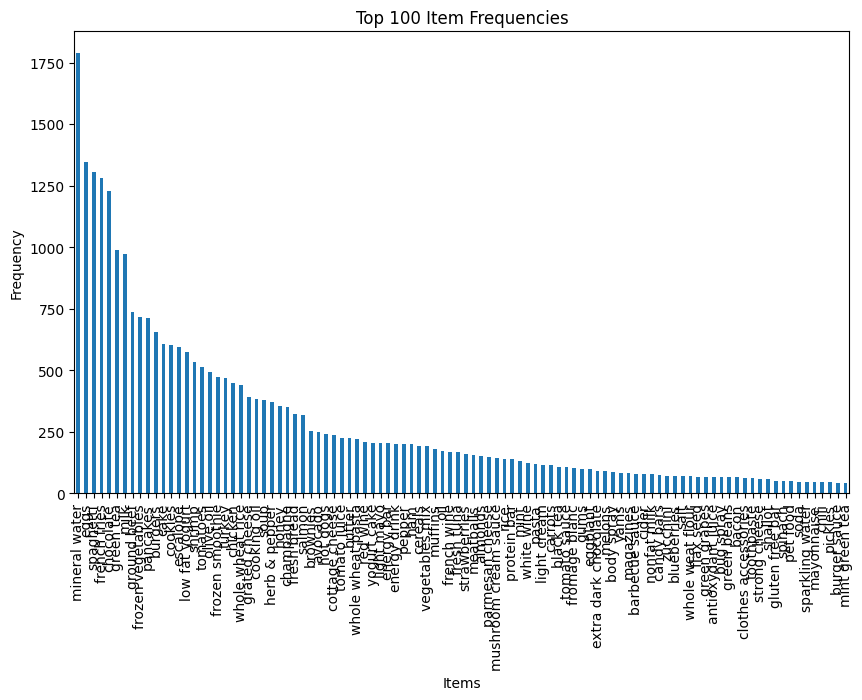

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [8]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

# Set the path to the file you'd like to load
file_path = "Market_Basket_Optimisation.csv"  # Specify the actual file name here

# Load the latest version of the dataset from KaggleHub
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "devchauhan1/market-basket-optimisationcsv",
  file_path,
)

# Display first 5 records
print("First 5 records:", df.head())

# Replace NaN values with empty strings (this step handles the NaN problem)
df = df.fillna("")

# Convert dataset into a list of transactions (each transaction is a list of items)
transactions = df.values.tolist()

# Use TransactionEncoder to convert the dataset into a format suitable for apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert to DataFrame
df_apriori = pd.DataFrame(te_ary, columns=te.columns_)

# **Remove empty itemsets from the DataFrame**
df_apriori = df_apriori.drop('', axis=1, errors='ignore')

# Visualizing the frequency of items
item_frequencies = df_apriori.sum(axis=0).sort_values(ascending=False)
item_frequencies[:100].plot(kind='bar', figsize=(10, 6))
plt.title('Top 100 Item Frequencies')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

# Running Apriori algorithm
# We are setting the min_support as 0.004 and using `low_memory=True` if needed for large datasets.
# The `min_length` argument is not available in `mlxtend.frequent_patterns.apriori`,
# so it's been replaced by filtering the results after they are generated.
frequent_itemsets = apriori(df_apriori, min_support=0.004, use_colnames=True)
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= 2)]

# Generating association rules from the frequent itemsets
# Adding support_only=True to address the KeyError
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, support_only=True)

# Sorting the rules by lift and displaying the top 10
rules_sorted_by_lift = rules.sort_values(by='lift', ascending=False)
print(rules_sorted_by_lift.head(10))